**K-means clustering algorithm for Mall Customers dataset.**


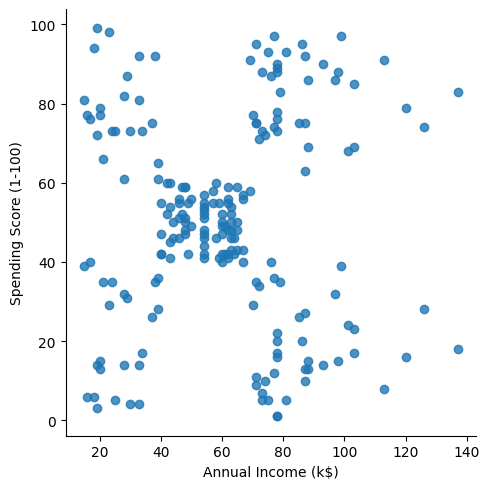

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Mall_Customers.csv')

sns.lmplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", fit_reg=False)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [6]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=['Annual Income (scaled)', 'Spending Score (scaled)'])


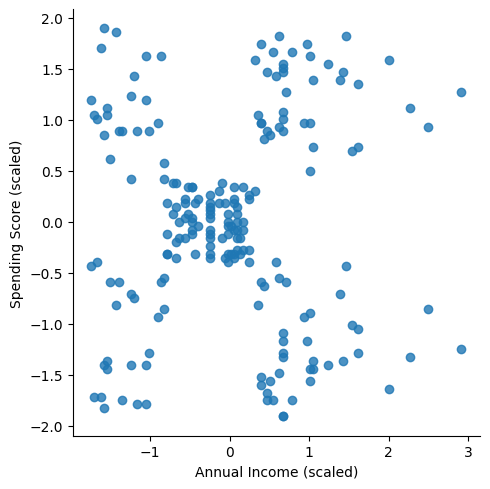

In [8]:
sns.lmplot(data=X_scaled_df, x='Annual Income (scaled)', y='Spending Score (scaled)', fit_reg=False)


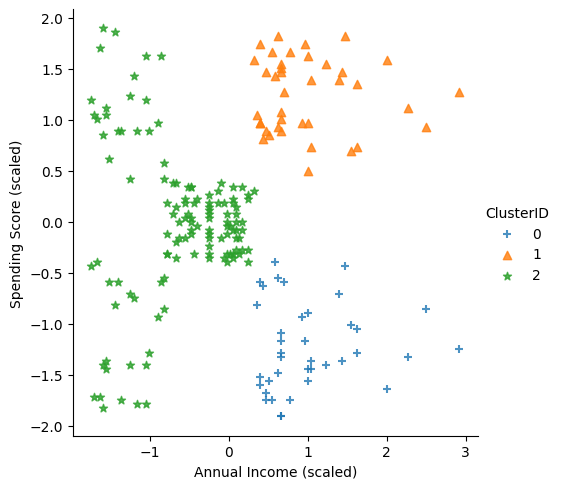

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled_df)
X_scaled_df['ClusterID'] = kmeans.labels_

markers = ['+', '^', '*']
sns.lmplot(x='Annual Income (scaled)', y='Spending Score (scaled)', data=X_scaled_df, hue='ClusterID', fit_reg=False, markers=markers)


In [10]:
print(X_scaled_df.groupby('ClusterID')[['Annual Income (scaled)', 'Spending Score (scaled)']].agg(['mean', 'std']))

          Annual Income (scaled)           Spending Score (scaled)          
                            mean       std                    mean       std
ClusterID                                                                   
0                       1.009200  0.621068               -1.225535  0.423774
1                       0.991583  0.622638                1.239503  0.363544
2                      -0.626190  0.612157               -0.014392  0.764562


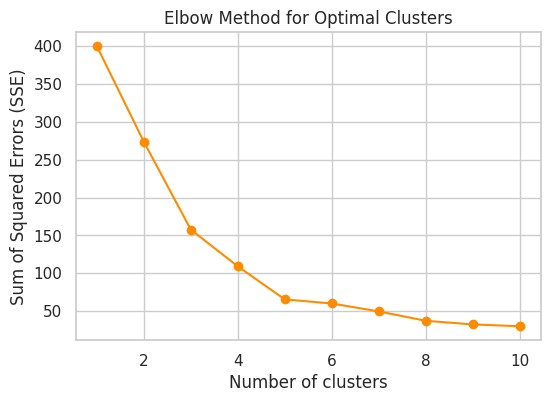

In [13]:
sse = []
cluster_range = range(1, 11)
for k in cluster_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled_df[['Annual Income (scaled)', 'Spending Score (scaled)']])
    sse.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(cluster_range, sse, marker='o',color='darkorange')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Clusters')
plt.show()